In [149]:
import spacy as spacy
import numpy as np
import pandas as 
import itertools
from itertools import groupbypd

In [2]:
data = pd.read_csv('C:/Users/Leads/Downloads/Technical Data Analyst DS Modeling Analysis Test/raw_data.csv')

In [3]:
data

name   zipcode          state country  \
0                b'A Cottage Collection'     41042             KY      US   
1         b'Codeblue Wellington Limited'      6011     Wellington      NZ   
2                          b'Ashby Show'  DE11 7AZ            NaN      GB   
3                     b'MCIS Consulting'     44902             OH      US   
4              b'Adirondack Restaurants'     12946             NY      US   
...                                  ...       ...            ...     ...   
4995                 b'KZN Legisslature'       NaN            NaN      ZA   
4996                        b'SW Colour'       NaN  Saxony-Anhalt      DE   
4997                           b'LilahV'     84020             UT      US   
4998                             b'Tuzo'   L5M 5T4             ON      CA   
4999  b'Calgary TELUS Convention Centre'   T2G 0P3             AB      CA   

     region                                        subindustry  \
0       NAS                                      Accommodation   
1      APAC                                        IT Services   
2      EMEA      Motion Picture and Sound Recording Industries   
3       NAS  Management, Scientific, and Technical Consulti...   
4       NAS                  Food Services and Drinking Places   
...     ...                                                ...   
4995   EMEA  Executive, Legislative, and General Government...   
4996   EMEA  Advertising Public Relations and Related Services   
4997    NAS           Clothing and Clothing Accessories Stores   
4998    NAS                                        IT Services   
4999    NAS  Advertising Public Relations and Related Services   

                          industry  
0                      Hospitality  
1           Information Technology  
2     Media and Telecommunications  
3            Professional Services  
4                      Hospitality  
...                            ...  
4995                    Government  
4996         Professional Services  
4997                        Retail  
4998        Information Technology  
4999         Professional Services  

[5000 rows x 7 columns]

In [4]:
def clean_name(name):
    if name[1] and name[-1] == "'":
        return name[2:-1]
    else:
        return name

In [5]:
# Checking the function works
clean_name(data.iloc[3,0])

'MCIS Consulting'

In [6]:
data['clean_name'] = data['name'].apply(lambda x: clean_name(x))
data

name   zipcode          state country  \
0                b'A Cottage Collection'     41042             KY      US   
1         b'Codeblue Wellington Limited'      6011     Wellington      NZ   
2                          b'Ashby Show'  DE11 7AZ            NaN      GB   
3                     b'MCIS Consulting'     44902             OH      US   
4              b'Adirondack Restaurants'     12946             NY      US   
...                                  ...       ...            ...     ...   
4995                 b'KZN Legisslature'       NaN            NaN      ZA   
4996                        b'SW Colour'       NaN  Saxony-Anhalt      DE   
4997                           b'LilahV'     84020             UT      US   
4998                             b'Tuzo'   L5M 5T4             ON      CA   
4999  b'Calgary TELUS Convention Centre'   T2G 0P3             AB      CA   

     region                                        subindustry  \
0       NAS                                      Accommodation   
1      APAC                                        IT Services   
2      EMEA      Motion Picture and Sound Recording Industries   
3       NAS  Management, Scientific, and Technical Consulti...   
4       NAS                  Food Services and Drinking Places   
...     ...                                                ...   
4995   EMEA  Executive, Legislative, and General Government...   
4996   EMEA  Advertising Public Relations and Related Services   
4997    NAS           Clothing and Clothing Accessories Stores   
4998    NAS                                        IT Services   
4999    NAS  Advertising Public Relations and Related Services   

                          industry                       clean_name  
0                      Hospitality             A Cottage Collection  
1           Information Technology      Codeblue Wellington Limited  
2     Media and Telecommunications                       Ashby Show  
3            Professional Services                  MCIS Consulting  
4                      Hospitality           Adirondack Restaurants  
...                            ...                              ...  
4995                    Government                 KZN Legisslature  
4996         Professional Services                        SW Colour  
4997                        Retail                           LilahV  
4998        Information Technology                             Tuzo  
4999         Professional Services  Calgary TELUS Convention Centre  

[5000 rows x 8 columns]

In [7]:
len(list(data['region'].unique()))

5

In [8]:
len(list(data['industry'].unique()))

18

In [9]:
frequency = pd.DataFrame(data.groupby('industry')['name'].count()).sort_values(by = 'name', ascending=False).reset_index().rename(columns={'name':'count'})
frequency['perc'] = frequency['count'].apply(lambda x: x/sum(frequency['count']))

In [60]:
frequency

industry  count    perc
0          Professional Services   1100  0.2200
1         Information Technology    929  0.1858
2                  Manufacturing    666  0.1332
3                         Retail    491  0.0982
4                     Healthcare    357  0.0714
5                    Hospitality    250  0.0500
6             Financial Services    205  0.0410
7                     Non-profit    205  0.0410
8                     Government    195  0.0390
9                    Real Estate    180  0.0360
10                     Education    130  0.0260
11  Media and Telecommunications    116  0.0232
12                  Construction     79  0.0158
13    Transportation & Logistics     59  0.0118
14                   Agriculture     18  0.0036
15             Mining, Oil & Gas      9  0.0018
16                     Wholesale      7  0.0014
17                     Utilities      4  0.0008

In [10]:
sum(frequency['count'])

5000

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
countries = list(data['country'].unique())
print(countries)

['US', 'NZ', 'GB', 'ES', 'BR', 'IT', 'DE', 'AU', 'FR', 'IN', 'NL', 'KE', 'SG', 'AE', 'QA', 'VG', 'JP', 'HR', 'PL', 'DK', 'NO', 'CH', 'CA', 'BE', 'UA', 'MY', 'CN', 'UY', 'SE', 'VE', 'FI', 'PT', 'LV', 'BG', 'MX', 'BD', 'AT', 'VN', 'SA', 'ZA', 'ZM', 'IL', 'TW', 'LT', 'TN', 'IE', 'TR', 'PR', 'EG', 'IR', 'EC', 'OM', 'AR', 'HK', 'CZ', 'RO', 'SI', 'PE', 'PK', 'RU', 'AG', 'CY', 'ID', 'KR', 'AS', 'CO', 'BH', 'GR', 'IM', 'ET', 'ZW', 'LU', 'TH', 'PH', 'NG', 'SS', 'CL', 'HU', 'LK', 'SK', 'NP', 'JO', 'DZ', 'BB', 'LB', 'EE', 'PA', 'IS', 'BM', 'NU', 'NI', 'MU', 'MT', 'GH', 'PY', 'RE', 'RS', 'VI', 'GG', 'DO', 'MN']


In [13]:
data[['region', 'country']].drop_duplicates()

region country
0       NAS      US
1      APAC      NZ
2      EMEA      GB
7      EMEA      ES
8       LAD      BR
...     ...     ...
4194   EMEA      RS
4346    LAD      VI
4413   EMEA      GG
4725    LAD      DO
4862   APAC      MN

[101 rows x 2 columns]

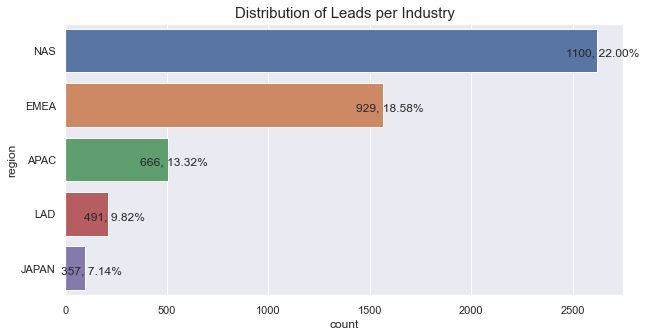

In [333]:
plt.figure(figsize = (10,5))
sns.set_theme(style = 'darkgrid')
hist = sns.barplot(x = 'count', y =regionry', data = frequen_regioncy)
patches = hist.patches
for i in range(len(patches)):
    x = max(100, patches[i].get_width() + 30)
    y = patches[i].get_y() + 0.5
    hist.annotate('{}, {:.2f}%'.format(frequency.iloc[i,1],frequency.iloc[i,2]*100), (x,y), ha = 'center')
plt.title('Distribution of LeRegionIndustry', fontsize = 15)
plt.show()

In [331]:
frequency_region = pd.DataFrame(data.groupby(['region'])['name'].count()).sort_values(by = 'name', ascending=False).reset_index().rename(columns={'name':'count'})
frequency_region['perc'] = frequency['count'].apply(lambda x: x/sum(frequency['count']))

In [332]:
frequency_region

region  count    perc
0    NAS   2619  0.2200
1   EMEA   1567  0.1858
2   APAC    507  0.1332
3    LAD    210  0.0982
4  JAPAN     97  0.0714

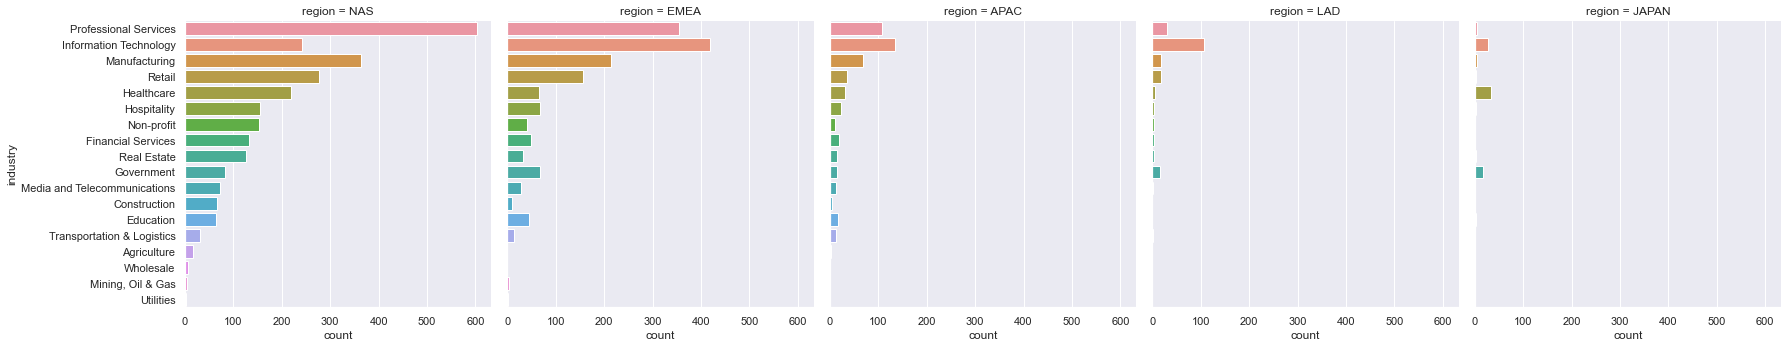

In [23]:
sns.catplot(x = 'count', y = 'industry', col = 'region', data = frequency_region, kind = 'bar')

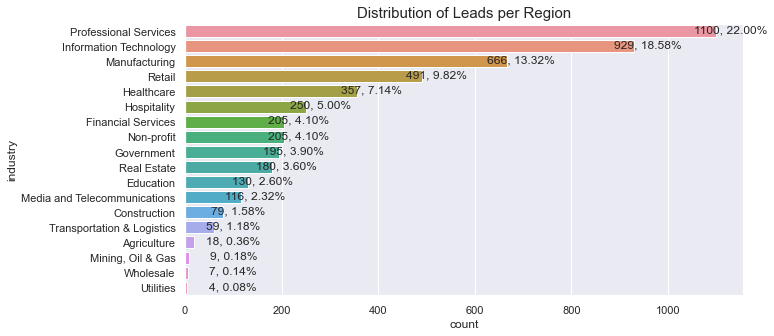

In [365]:
plt.figure(figsize = (10,5))
sns.set_theme(style = 'darkgrid')
hist = sns.barplot(x = 'count', y = 'industry', data = frequency)
patches = hist.patches
for i in range(len(patches)):
    x = max(100, patches[i].get_width() + 30)
    y = patches[i].get_y() + 0.5
    hist.annotate('{}, {:.2f}%'.format(frequency.iloc[i,1],frequency.iloc[i,2]*100), (x,y), ha = 'center')
plt.title('Distribution of Leads per Region', fontsize = 15)
plt.show()

## Cleaning and Tokenizing the Names

In [42]:
import re
from spacy.lang.en import English
nlp = English()d()

In [86]:
data['clean_name'] = data['clean_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9_\s]', '', x))

data['clean_name'] = data['clean_name'].apply(lambda x: x.lower())text = re.sub(r'[^a-zA-Z0-9_\s]', '', text)

In [153]:
def token(doc):
    vect = []
    token_list = nlp(doc)
    for a in token_list:
        if a.is_stop == False:
            vect.append(str(a))

    return vect


In [154]:
data['tokens'] = data['clean_name'].apply(lambda x: token(x))
data['keywords'] = data['tokens'].apply(lambda x: ' '.join(map(str,x)))

In [334]:
data

name   zipcode          state country  \
0                b'A Cottage Collection'     41042             KY      US   
1         b'Codeblue Wellington Limited'      6011     Wellington      NZ   
2                          b'Ashby Show'  DE11 7AZ            NaN      GB   
3                     b'MCIS Consulting'     44902             OH      US   
4              b'Adirondack Restaurants'     12946             NY      US   
...                                  ...       ...            ...     ...   
4995                 b'KZN Legisslature'       NaN            NaN      ZA   
4996                        b'SW Colour'       NaN  Saxony-Anhalt      DE   
4997                           b'LilahV'     84020             UT      US   
4998                             b'Tuzo'   L5M 5T4             ON      CA   
4999  b'Calgary TELUS Convention Centre'   T2G 0P3             AB      CA   

     region                                        subindustry  \
0       NAS                                      Accommodation   
1      APAC                                        IT Services   
2      EMEA      Motion Picture and Sound Recording Industries   
3       NAS  Management, Scientific, and Technical Consulti...   
4       NAS                  Food Services and Drinking Places   
...     ...                                                ...   
4995   EMEA  Executive, Legislative, and General Government...   
4996   EMEA  Advertising Public Relations and Related Services   
4997    NAS           Clothing and Clothing Accessories Stores   
4998    NAS                                        IT Services   
4999    NAS  Advertising Public Relations and Related Services   

                          industry                       clean_name  \
0                      Hospitality             a cottage collection   
1           Information Technology      codeblue wellington limited   
2     Media and Telecommunications                       ashby show   
3            Professional Services                  mcis consulting   
4                      Hospitality           adirondack restaurants   
...                            ...                              ...   
4995                    Government                 kzn legisslature   
4996         Professional Services                        sw colour   
4997                        Retail                           lilahv   
4998        Information Technology                             tuzo   
4999         Professional Services  calgary telus convention centre   

                                    tokens                         keywords  
0                    [cottage, collection]               cottage collection  
1          [codeblue, wellington, limited]      codeblue wellington limited  
2                                  [ashby]                            ashby  
3                       [mcis, consulting]                  mcis consulting  
4                [adirondack, restaurants]           adirondack restaurants  
...                                    ...                              ...  
4995                   [kzn, legisslature]                 kzn legisslature  
4996                          [sw, colour]                        sw colour  
4997                              [lilahv]                           lilahv  
4998                                [tuzo]                             tuzo  
4999  [calgary, telus, convention, centre]  calgary telus convention centre  

[5000 rows x 10 columns]

In [68]:
token_list = []
for token in text:
    token_list.append(token.text)

In [69]:
from spacy.lang.en.stop_words import STOP_WORDS

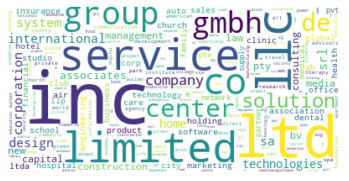

In [131]:
import wordcloud
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(data['keywords']))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.Titlelt.show()

## Additional Stop Words

Initial check on the most frequently occuring tokens and we see that these are not really insightful. These are typical company designations and so we will add these to our stopwords including other noise texts.
   <br>&emsp; &emsp; &emsp; - llc
   <br>&emsp; &emsp; &emsp; - gmbh
   <br>&emsp; &emsp; &emsp; - inc
   <br>&emsp; &emsp; &emsp; - co
   <br>&emsp; &emsp; &emsp; - company
   <br>&emsp; &emsp; &emsp; - ltd
   <br>&emsp; &emsp; &emsp; - limited
   <br>&emsp; &emsp; &emsp; - group
   <br>&emsp; &emsp; &emsp; - ltda
   <br>&emsp; &emsp; &emsp; - de
   <br>&emsp; &emsp; &emsp; - pvt
   <br>&emsp; &emsp; &emsp; etc
   


In [373]:
co_stopwords = ['llc', 'gmbh', 'inc', 'co', 'company', 'ltd', 'limited', 'group', 'ltda', 'de', 'pvt', 'llp', 'srl', 'sa']

In [258]:
def wordcloud_generate(column, filter):
    word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=co_stopwords).generate(' '.join(data[data[column] == filter]['keywords']))
    plt.figure(figsize=(10,5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(filter + ' Industry', fontsize = 15)
    plt.show()

In [ ]:
def keys_frequency(words):
    

In [204]:
len(data['industry'].unique())

18

In [363]:
def freq_table(column):
    a = []
    for x in data[data['industry'] == column]['tokens']:
        for y in x:
            if y not in co_stopwords and y.strip() != '':
                a.append(y)
    return pd.DataFrame.from_dict(dict(Counter(a)), orient = 'index', columns = ['freq']).sort_values(by = 'freq', ascending = False)

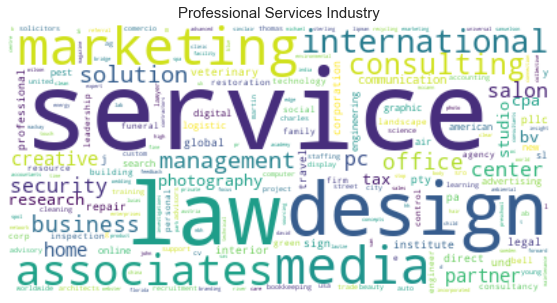

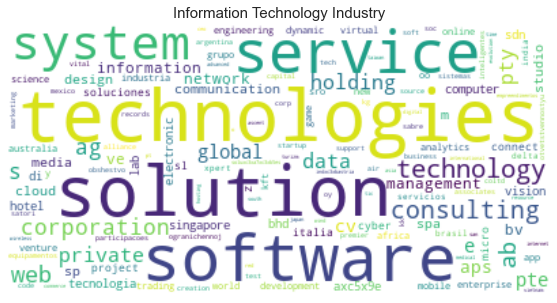

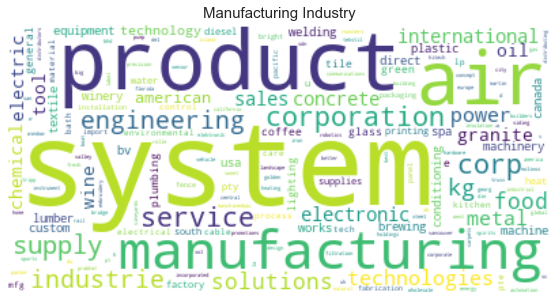

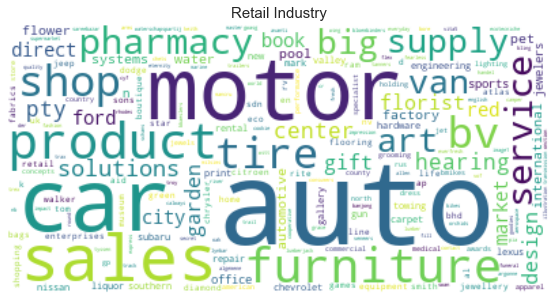

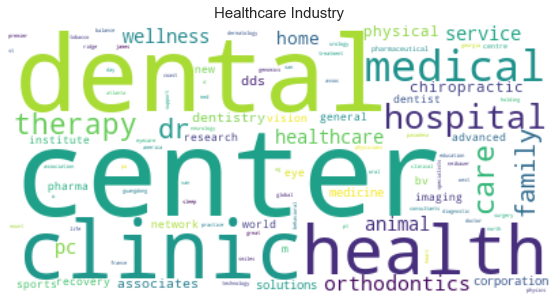

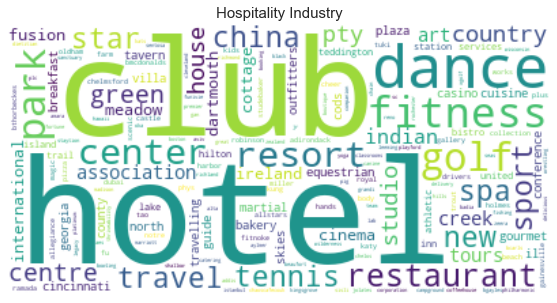

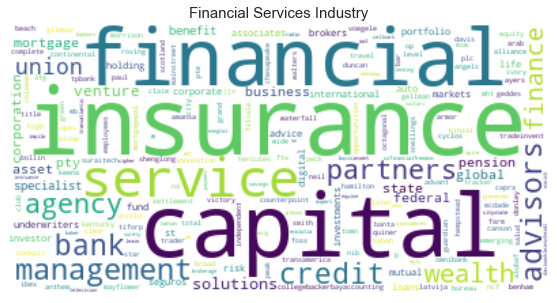

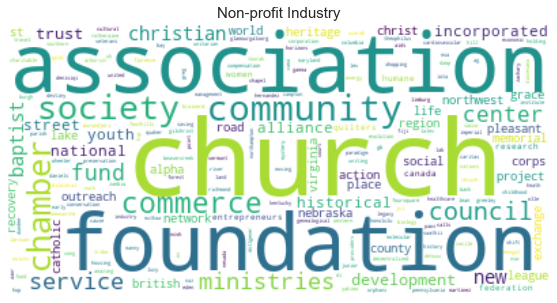

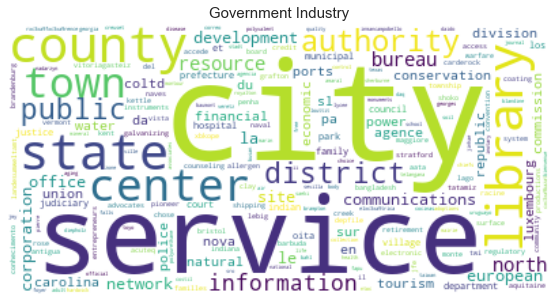

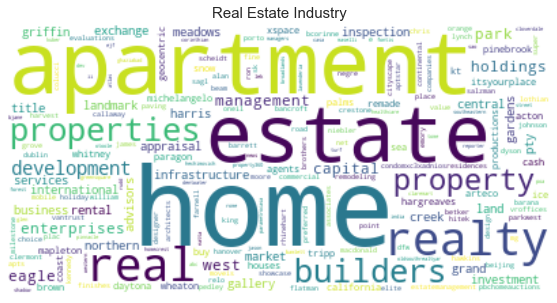

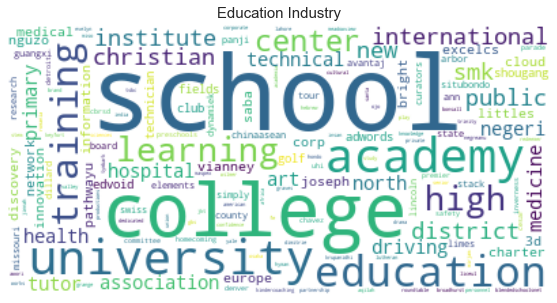

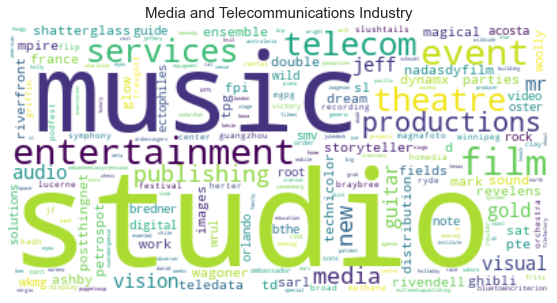

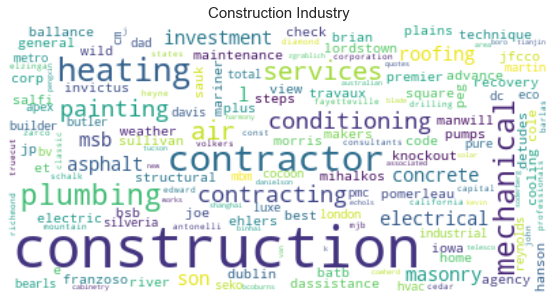

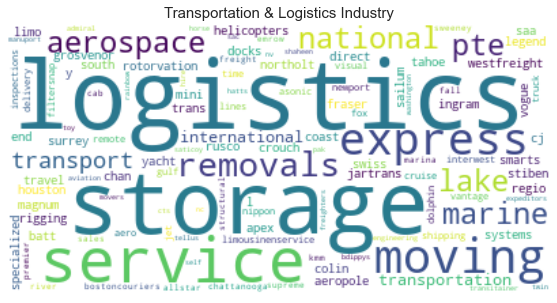

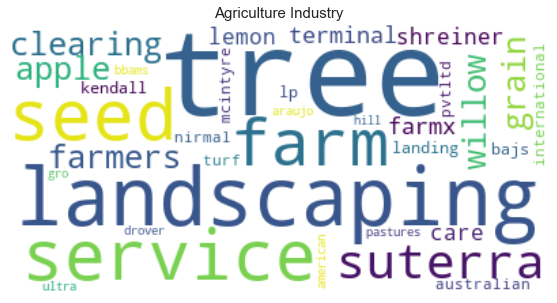

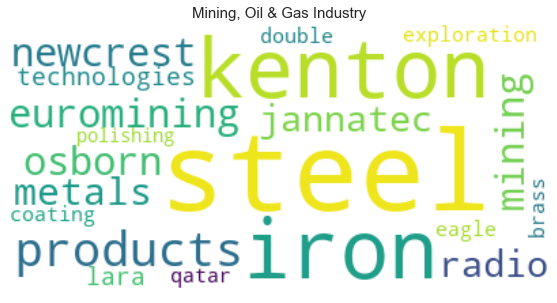

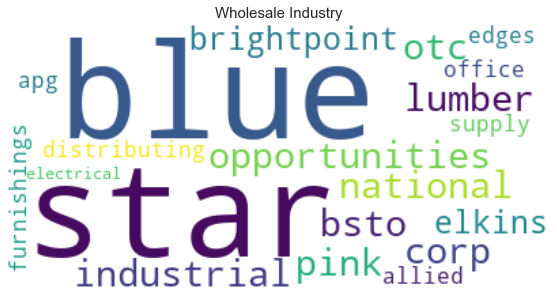

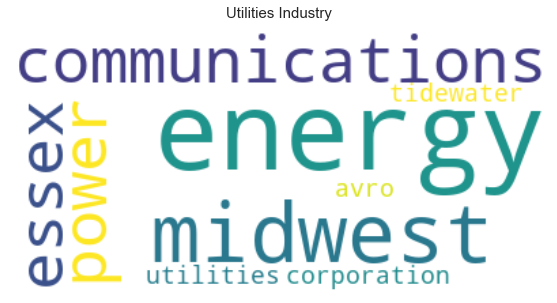

In [374]:
for x in frequency['industry']:     
    wordcloud_generate('industry', x)

## Exploratory Analysis (for Top 3 Industries: Professional Services, Information Technology, Retail)


#### Professional Services

The companies under the Professional Services industry belong to the legal, marketing & advertising, consulting, & research services. It is quite notable that the 'Others' subindustry dominates the list -- which is an oppportunity to further inspect and infer the nature of the business through keywords. The values for these 'Others' category can be further imputed by doing a text classification model in the future. 

'Media' frequently occurs in the Professional Services. However these are mostly in the advertising industry and not to be confused with the Media companies in the Media & Telecom industry.

In [377]:
freq_table('Professional Services').head(5)

freq
services      42
law           27
design        26
marketing     22
associates    22

In [227]:
ps = data[data['industry'] == 'Professional Services']
psname'].groupby('subindustry').c['name'].sort_values(ascending = False)ount()me']

subindustry
Other Professional Scientific and Technical Services           299
Advertising Public Relations and Related Services              244
Management, Scientific, and Technical Consulting Services      159
Legal Services                                                 117
Personal and Laundry Services                                   76
Specialized Design Services                                     70
Accounting Tax Preparation Bookkeeping and Payroll Services     51
Administrative and Support Services                             48
Architectural Engineering and Related Services                  20
Repair and Maintenance                                          14
Scientific Research and Development Services                     1
Waste Management and Remediation Services                        1
Name: name, dtype: int64

Inspecting the most frequent keywords in the Others subindustry, the words 'international', and 'service' dominate the list. These are inconclusive with respect to predicting their probable category and would rightly be in the Others section. However, there exists other keywords that seem to be miscategorized such as 'logistic', 'photography', 'home', 'travel', etc. Keyword 'research' also seems to better categorized in the Scientific Research and Development Services instead.

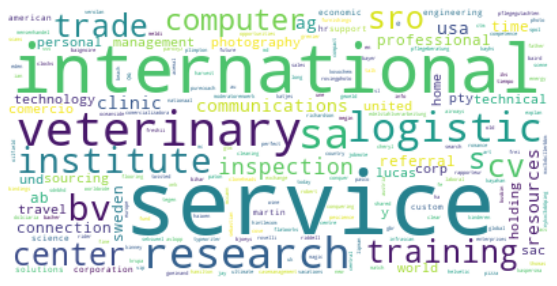

In [251]:
# Word cloud of names in the professional services > Other Professional Scientific and Technical Services

word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=co_stopwords).generate(' '.join(ps[ps['subindustry']=='Other Professional Scientific and Technical Services']['keywords']))
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Information Technology



Top keywords in the Information Technology Sector are concurrent with industry buzzwords. 

In [270]:
it = data[data['industry'] == 'Information Technology']
pitgroupby('subindustry').count()['name'].sort_values(ascending = False)

subindustry
IT Services            796
Enterprise Software     95
General Software        30
Education Software       2
Healthcare Software      2
Consumer Software        1
Financial Software       1
Industrial Software      1
Online Publishing        1
Name: name, dtype: int64

In [376]:
freq_table('Information Technology').head(5)

freq
technologies    29
solutions       24
software        24
services        17
systems         17

## Manufacturing Technology

Similar to Professional Servces, the Manufacturing industry also has bulk of 'Others'. Inspection of the companies belonging to this group shows that there is room for a classification model to infer the probable specific category. Specifically, 'lumber' -> Wood Products, 'metal', 'steel' -> Fabricated Metal, and Others

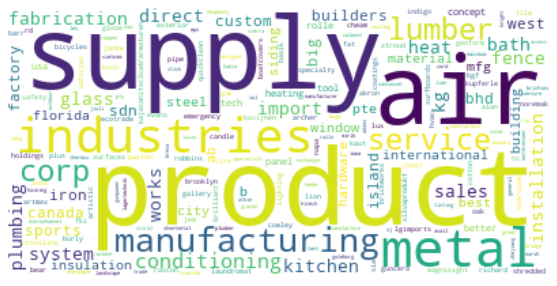

In [381]:
mf = data[data['industry'] == 'Manufacturing']
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=co_stopwords).generate(' '.join(mf[mf['subindustry']=='Other Miscellaneous Manufacturing']['keywords']))
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [383]:

mf.groupby('subindustry').count()['name'].sort_values(ascending = False)

subindustry
Other Miscellaneous Manufacturing                              238
Machinery Manufacturing                                        131
Food Manufacturing                                             100
Electrical Equipment Appliance and Component Manufacturing      69
Apparel Manufacturing                                           37
Basic Chemical Manufacturing                                    29
Computer and Electronic Product Manufacturing                   23
Plastics and Rubber Products Manufacturing                      14
Wood Product Manufacturing                                      10
Soap Cleaning Compound and Toilet Preparation Manufacturing      5
Paper Manufacturing                                              3
Printing and Related Support Activities                          3
Fabricated Metal Product Manufacturing                           2
Transportation Equipment Manufacturing                           2
Name: name, dtype: int64

## Recommendations

More specific profiles of firmographic data could be achieved by imputing 'Others' categories in the SubIndustry. Often, companies in the other sections can be classified into a more specific catgeory through the keywords in their names. Hence, a text classification algorithm using the Bag of Words model could be produced to enhance the data.